# Data visualization with PCA

In this notebook, we ran PCA on our data set to try to gain a better understanding of the data at hand


In [1]:
#Loading the data
train <- read.csv(file = '../../Data/training_data.csv')

In [2]:
#Removing the response and other variables
data.train <- train[,c(-1,-2,-3)]

#Declaring a function to remove predictors with 0 variance. This function returns the indices of the predicors with 0 variance.
ZeroVar <- function(dat) {
    out <- lapply(dat, function(x) length(unique(x)))
    want <- which(!out > 1)
    unlist(want)
}

#Applying the ZeroVar function
data.train.clean <- data.train[,-ZeroVar(data.train)]
                  
#Scaling the data and running PCA                 
data.train.final <- scale(data.train.clean)
pca <- prcomp(data.train.final, scale = F)            

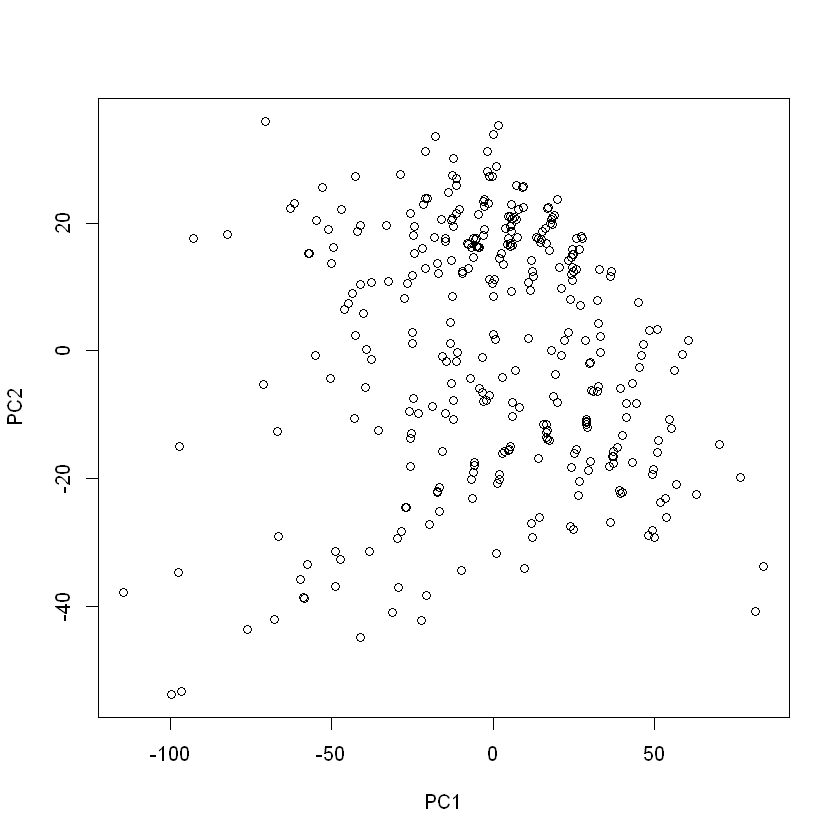

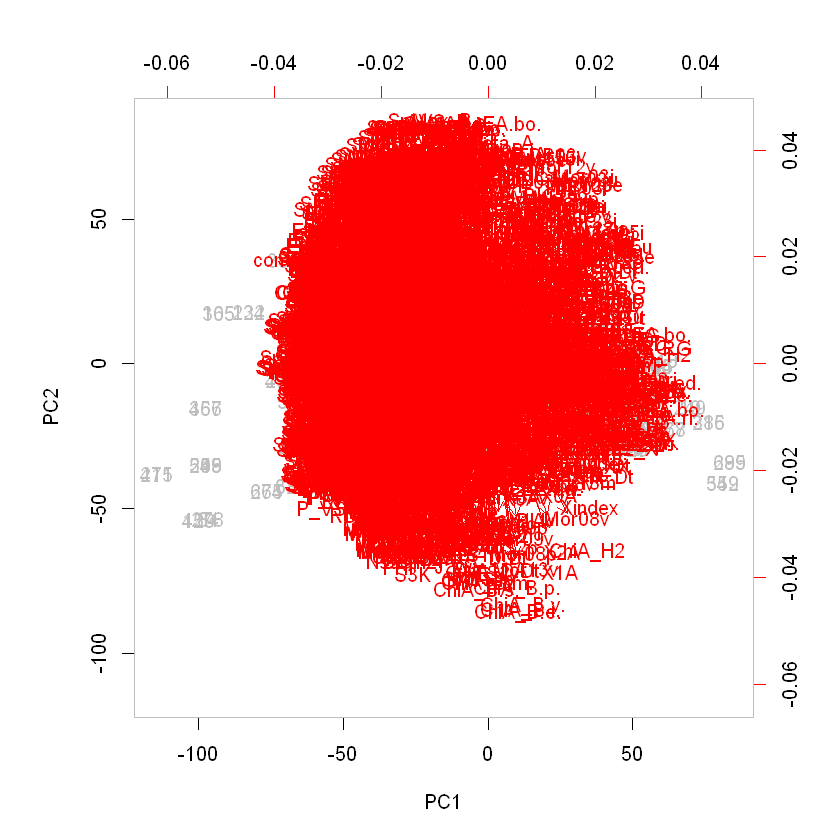

In [3]:
#Plotting the PCA results
plot(pca$x[,1:2])
biplot(pca, col = c("grey", 'red'), scale = 0)

## Analysis

We cannot distinguish any apparent structure of the data from the first plot. The biplot is unfortunately unreadable as the dimensionality remains too high. After a lot of searching, we could not find a way to crop the results and plot a better graph


## Proportional variance explained

We now plot the proportional variance explained to see if we can find more information

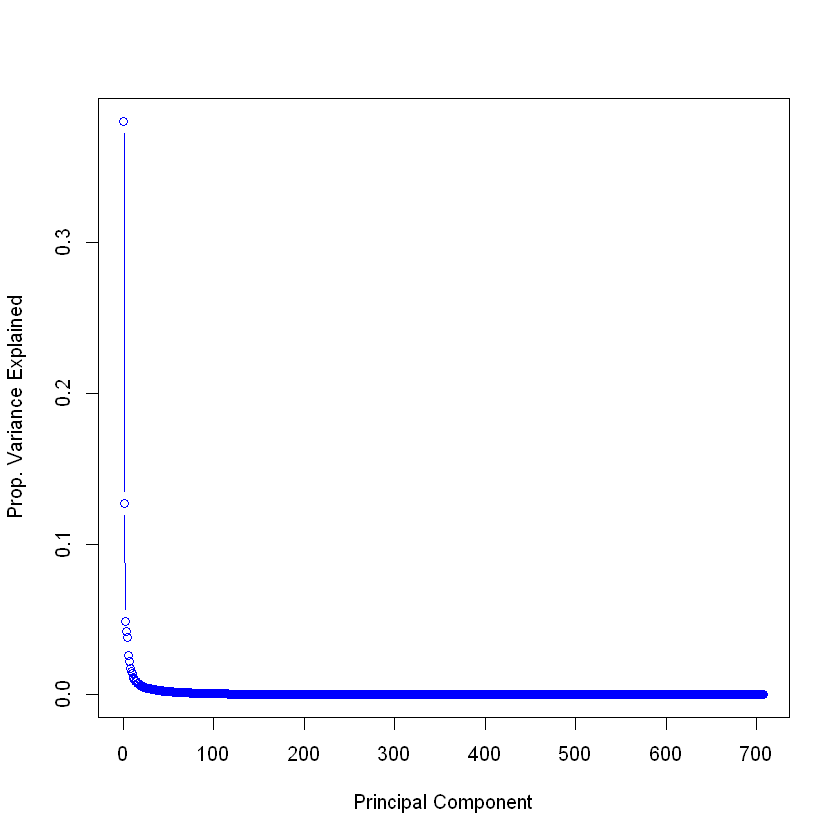

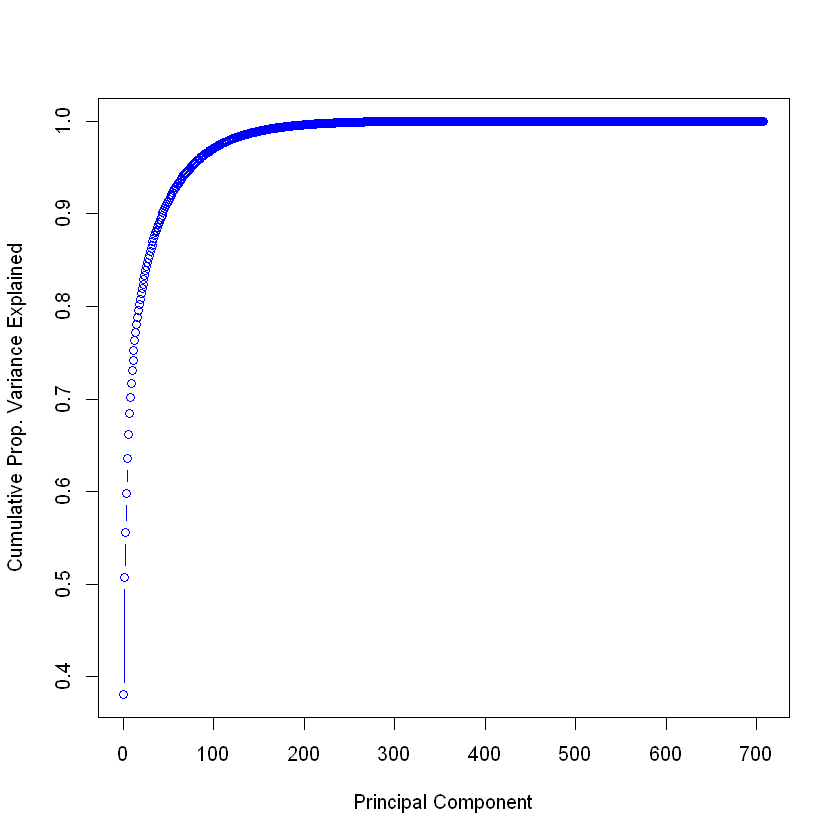

In [6]:
#Standard way to calculate the prop. var explained and cumulative Prop. Variance Explained
pca.var <- pca$sdev^2
pca.vare <- pca.var / sum(pca.var)
plot(pca.vare, xlab = "Principal Component", ylab = "Prop. Variance Explained", col = "blue", type = "b")
plot(cumsum(pca.vare), xlab = "Principal Component", ylab = "Cumulative Prop. Variance Explained", col = "blue", type = "b")

## Analysis

We can see that the first few PCA components explain a lot of the variance. Looking at the second graph, the 200-300 first PCA components account for nearly 100% of the variance.

However, after a discution with the teacher and with TAs, we decided to stop here as the data shows no signs of real organisation. Whilst 200-300 dimensions is a factor 10 less that the initial 4000+ predictors, it is still to much to proporely understand and use feature engineering on. 

In [16]:
idx <- which.max(pca$center)
pca$center[idx]

SpDiam_X 
2.186594e-15

In [18]:
idx <- which.max(pca$scale)
pca$center[idx]

H_RG 
2.682145e-17

In [19]:
idx <- which.max(pca$rotation)
pca$center[idx]

<NA> 
  NA

In [21]:
idx <- which.max(pca$x)
pca$center[idx]

SpAD_G.D 
1.287444e-16

In [33]:
idx <- which.max(abs(pca$rotation[,1]))
pca$rotation[idx,1]
idx

[1] -0.02921218

Psi_i_0 
    126

In [38]:
pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC699,PC700,PC701,PC702,PC703,PC704,PC705,PC706,PC707,PC708
complexity.from.pubmed,-0.0239323214,1.932486e-02,-0.008930285,-6.253939e-06,-0.0244098084,-0.0060356208,-0.0079749830,0.0151941587,-4.441941e-03,0.0123314270,...,7.658813e-04,-0.0005622771,-9.663202e-05,-0.0012759205,-0.0003048031,7.006271e-05,-6.440646e-04,0.0007898324,-0.025056261,-0.059728136
MW,-0.0262224204,2.038938e-03,0.018776422,-2.081844e-03,-0.0305602950,0.0200910647,0.0079832176,-0.0054708906,8.041246e-03,0.0007866486,...,1.172228e-03,-0.0014821960,1.564376e-03,-0.0016882315,0.0004109275,-1.243197e-03,-1.450717e-03,0.0008367866,0.213927359,0.069803716
AMW,0.0054075927,6.227013e-03,0.042958185,-8.735353e-04,-0.0555111343,0.0514649517,0.0331958026,-0.0173913261,-1.490761e-02,-0.0028491303,...,-1.175755e-03,0.0012374557,-4.001455e-04,0.0006972964,0.0003687312,1.593076e-03,7.674834e-06,0.0013100699,-0.279653950,-0.400493354
Sv,-0.0291245365,-4.593006e-03,0.001349476,8.592395e-03,-0.0041177544,-0.0017403922,-0.0015468979,-0.0023778443,2.312694e-03,-0.0043222832,...,4.132028e-03,-0.0052858816,-5.168685e-03,-0.0043281138,0.0084174390,5.258100e-03,1.888645e-05,0.0048183325,0.196688770,-0.075505817
Se,-0.0279695350,-1.360812e-02,-0.008690632,8.635830e-03,-0.0036843943,-0.0014128783,0.0006005686,-0.0019963266,6.817802e-04,-0.0080757891,...,9.622557e-03,-0.0228413880,-4.462846e-03,-0.0160164669,-0.0034959600,1.128941e-02,1.280255e-03,-0.0089107599,-0.007910810,-0.017132322
Sp,-0.0284555917,-8.567655e-03,0.002924537,1.514574e-02,-0.0053010190,0.0016892977,-0.0004986238,-0.0035207042,4.499892e-03,-0.0038869911,...,8.290281e-03,-0.0059113541,1.861104e-02,0.0113770855,0.0273635381,-8.972233e-03,-3.960814e-03,0.0074557097,0.012600769,0.220721491
Si,-0.0274690599,-1.558679e-02,-0.009652336,1.131058e-02,-0.0027013591,-0.0012289979,0.0010228693,-0.0026609554,1.055530e-07,-0.0090895359,...,-1.240304e-02,-0.0120571161,3.436831e-03,-0.0132654708,0.0036944553,2.772408e-02,-3.882712e-03,0.0288186603,0.094034985,-0.104078637
Mv,0.0025515375,3.228872e-02,0.052306184,-6.729983e-03,-0.0258303215,0.0191751651,0.0235554439,-0.0100699072,5.434777e-03,0.0025911525,...,1.370819e-02,-0.0015759887,9.688625e-03,-0.0034395039,0.0073563092,-7.230274e-04,-1.334508e-02,-0.0060816050,-0.055480703,0.030056996
Me,0.0052723693,2.143078e-02,-0.008905181,-6.625169e-02,-0.0270616291,-0.0124238188,0.0156109893,0.0087524071,8.142092e-03,0.0025806835,...,-3.813244e-03,0.0185202053,-7.594001e-03,0.0109666975,-0.0031866043,-4.727103e-03,1.036440e-02,-0.0006609211,0.010128276,0.010117631
Mp,0.0041382821,1.292687e-02,0.056270946,1.519582e-02,-0.0407462435,0.0443728701,0.0250365527,-0.0154974444,2.034502e-03,0.0031857046,...,8.223099e-04,-0.0021116767,-2.516630e-03,-0.0026436605,0.0132742854,-1.261822e-02,-2.050111e-03,0.0099829326,-0.007999927,0.007000150


# PCR (principle component regression)

as we saw our method are way too flexible, we will try to regress on PC